In [1]:
import os 
import tarfile
import urllib

In [2]:
housing_tgz = tarfile.open("housing.tgz")
housing_tgz.extractall()
housing_tgz.close()

In [3]:
import pandas as pd
csv_data = pd.read_csv("housing.csv") 


In [4]:
csv_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
csv_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

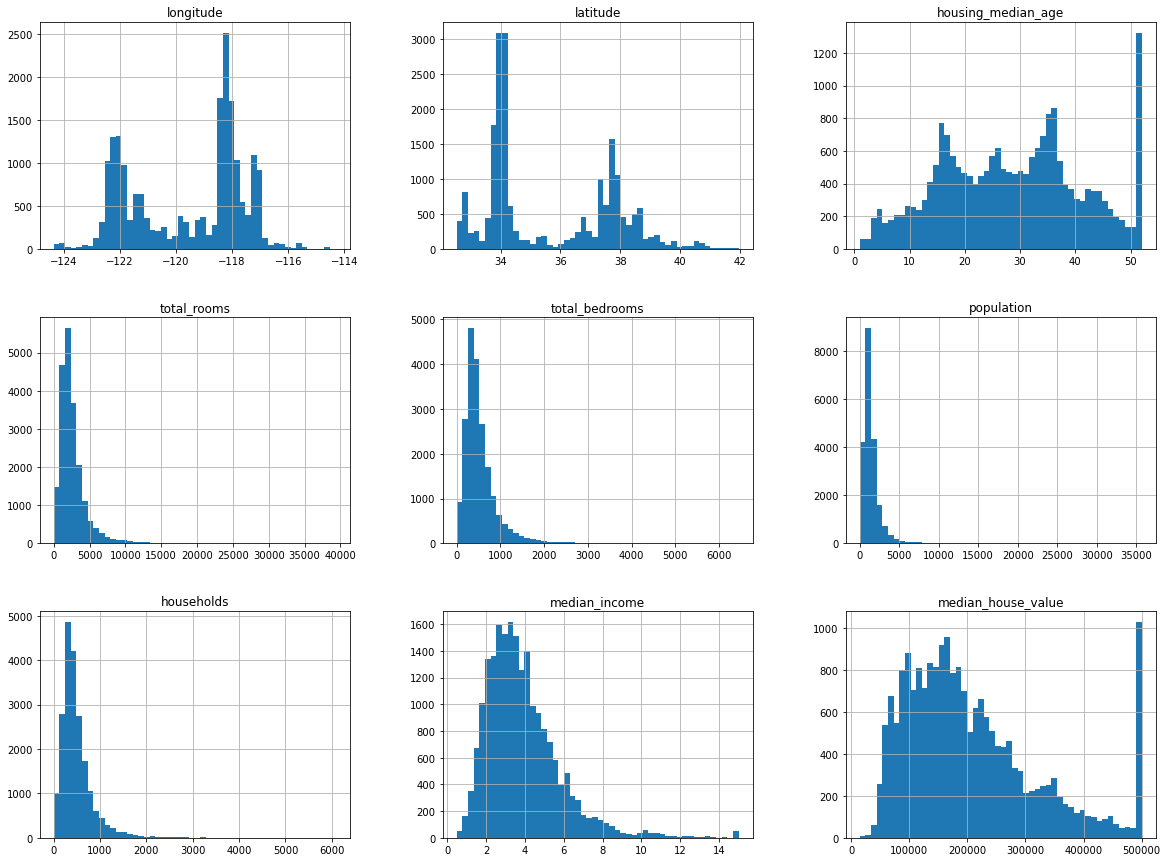

In [7]:
import matplotlib.pyplot as plt
csv_data.hist(bins=50, figsize=(20,15))

Before starting any ML project almost set some test data aside.

In [8]:
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size+1:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
import numpy as np
shuffled_indices = np.random.permutation(len(csv_data))

In [10]:
shuffled_indices

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [11]:
train_data, test_data = split_train_test(csv_data, .2)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9860,-121.86,36.60,21.0,3634.0,1011.0,1985.0,917.0,2.9085,156300.0,<1H OCEAN
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,263800.0,NEAR OCEAN
1217,-120.90,38.20,16.0,3120.0,641.0,1319.0,526.0,2.0472,93200.0,INLAND
5853,-118.32,34.17,47.0,2589.0,465.0,1284.0,485.0,5.1008,247100.0,<1H OCEAN
8177,-118.09,33.80,36.0,1724.0,322.0,838.0,328.0,4.4831,253900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN
123,-122.24,37.84,52.0,3529.0,574.0,1177.0,555.0,5.1773,389500.0,NEAR BAY
17789,-121.83,37.35,31.0,2914.0,715.0,3547.0,645.0,3.7143,178600.0,<1H OCEAN
18814,-121.45,41.04,33.0,2029.0,378.0,936.0,343.0,2.6700,77500.0,INLAND


This dataset has no ID Column, therefore if you need to use row number as index be sure to add new data to at the end of the dataset

In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
csv_data_with_id = csv_data.reset_index()

In [15]:
csv_data_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [16]:
train_set, test_set = split_train_test_by_id(csv_data_with_id, .2, "index")

In [17]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


SciKit-Learn provides model_selection train_test_split method 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set = train_test_split(csv_data, test_size = .2, random_state=42)

In [20]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [21]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


#### Stratified Sampling

So far, sampling methdods were stochastic. However, if the training data is not too big, a bias may occur. Assume a survey is conducted in Turkey. According to national statistic office there are 53.1% women in Turkey. So a successful survey pursue to have this balance in their dataset as well. For 1000 population survey, there must be 531 women and 469 men.


The higher the norm of the inedx, the more it focuses on large values and neglects small ones. This is why RMSE is more sensitive to outliers than MAE, but when outliers are rare RMSE is preferred over MAE.

Suppose you chatted with experts, who told you that the median income is a very important attribute to predict median housing prices. Since the median income is a cntuos numerical attr, you first need to create an income category attribute.

It is important to have enough nmber of instances in the dataset for each statum ort else estimate of stratum's importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.

pd.cut() -> bin values ino discrete intervals

In [22]:
csv_data["income_category"] = pd.cut(csv_data["median_income"],bins=[0.,1.5,3.,4.5,6.,np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

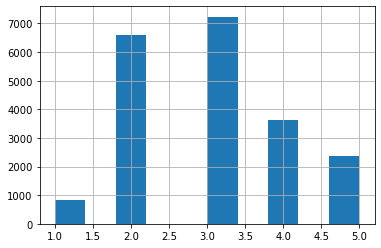

In [23]:
csv_data["income_category"].hist()

With these categorization you can perform stratifiedshufflesplit, Stratified Sampling

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_index, test_index in split.split(csv_data, csv_data["income_category"]):
    stratified_train_set = csv_data.loc[train_index]
    stratified_test_set = csv_data.loc[test_index]

In [25]:
stratified_test_set["income_category"].value_counts() / len(stratified_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_category, dtype: float64

<AxesSubplot:>

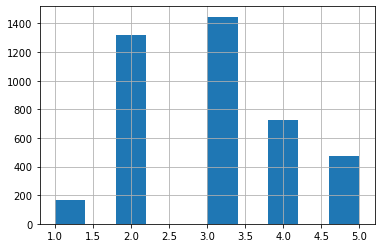

In [26]:
stratified_test_set["income_category"].hist()

In [27]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop("income_category", axis=1, inplace=True)
    # set_.drop("income_cat", axis=1, inplace=True)

### Now it's time to explore the data

In [28]:
copy_set = stratified_train_set.copy()

In [29]:
copy_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

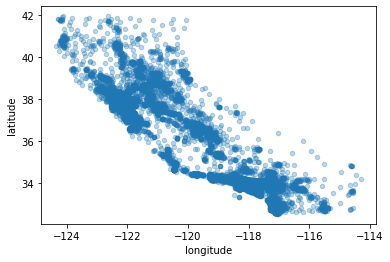

In [30]:
csv_data.plot(kind="scatter",x="longitude",y="latitude", alpha=.3)

s is the size for the data points in Pd plot

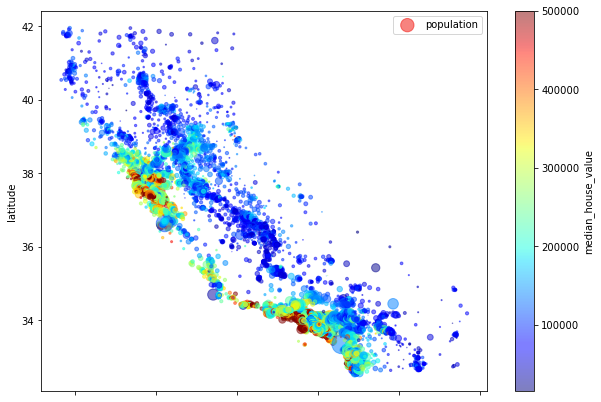

In [31]:
csv_data.plot(kind="scatter", x="longitude", y="latitude",alpha=0.5,s=csv_data["population"] / 100, label="population",figsize=(10,7), c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

plt.legend()

In [32]:
corr_matrix = csv_data.corr()

In [33]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [34]:
csv_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [35]:
csv_data["rooms_per_household"] = csv_data["total_rooms"] / csv_data["households"]
csv_data["bedroom_per_room"] = csv_data["total_bedrooms"] / csv_data["total_rooms"]
csv_data["population_per_household"] = csv_data["population"] / csv_data["households"]

In [36]:
csv_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedroom_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


In [37]:
corr_matrix = csv_data.corr()
corr_matrix["median_house_value"].sort_values(ascending=True)

bedroom_per_room           -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

### Prepare the data for Machine Learning Algorithms

Check which columns contain NaN inside and get rid of them.

In [38]:
copy_set = stratified_train_set.drop("median_house_value",axis = 1)
copy_set.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [39]:
# Either you delete data
# Either get rid of whole attribute
# Set values to some value

In [40]:
csv_data.dropna(subset=["total_bedrooms"]).isna().any() # clear as you can see

longitude                   False
latitude                    False
housing_median_age          False
total_rooms                 False
total_bedrooms              False
population                  False
households                  False
median_income               False
median_house_value          False
ocean_proximity             False
income_category             False
rooms_per_household         False
bedroom_per_room            False
population_per_household    False
dtype: bool

In [41]:
csv_data.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_category,rooms_per_household,bedroom_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND,2,5.329513,0.219892,2.123209


SciKit-Learn agains comes to the rescue and give you SimpleImputer for filling NaN values 

In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [55]:
# Since median can only be computed on numerical data exclude ocean_proximity (object type)

csv_numerical = copy_set.drop("ocean_proximity",axis=1)

In [56]:
csv_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [57]:
imputer.fit(csv_numerical)

SimpleImputer(strategy='median')

In [58]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [59]:
# In the case of the book, the NaN values only occur in single column but in real-life any column can be NaN, so it is better to be cautious.


csv_numerical.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [60]:
X = imputer.transform(csv_numerical)

In [61]:
type(X)

numpy.ndarray

In [62]:
csv_numerical = pd.DataFrame(X, columns=csv_numerical.columns, index=csv_numerical.index)

In [63]:
csv_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [64]:
from sklearn.preprocessing import OrdinalEncoder
my_data = copy_set[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
copy_set_cat_encoded = ordinal_encoder.fit_transform(my_data)
copy_set_cat_encoded[:10]
copy_set_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

One issue with ML algorithms in Sci-Kit is that they think close values are similar to each other while distants are dissimilar

In [65]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [66]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
csv_data_1hot = cat_encoder.fit_transform(copy_set)

In [67]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
csv_data_1hot = cat_encoder.fit_transform(my_data)

In [68]:
csv_data_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [69]:
csv_data_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

<center><h1>TIP</h1></center>

If a categorical column have too many different possible values, then it is better not to use 1 hot vector. This may degrade performance significantly. You may replace this with distance to ocean and another metric meaningful. Alternatively, representtional learning helps you to find embedding in lower dimension.

### Custom Transformers

Like in PyTorch, sometimes you need write your own methods. To make your transformer run seamlessy with SciKit-Learn functionalites(e.g pipelines), and since Scikit_Learn relies on Duck Typing (not inheritance) all you need to do is create a class and implement 3 methods

In [70]:
# fit() return self, transform() and fit_transform() 

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_idx, bedrooms_idx, population_idx, households_idx = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_house = X[:,rooms_idx] / X[:,households_idx]
        population_per_house = X[:,population_idx] / X[:,households_idx]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_idx] / X[:,households_idx]
            return np.c_[X, rooms_per_house, population_per_house, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_house, population_per_house]
mydata = pd.read_csv("housing.csv")
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(mydata.values)

### Feature Scaling

With very small set of exceptions, ML algorithms need feature scaling. They don't perform well otherwise. 

Two common ways to perform feature scaling

Min-Max Scaling (Aka Normalization 0-1 range) Sci-Kit Learn again provides implementations

Standardization: First subtract mean val, then divide by standard deviation

Standardization method is robust to outliers, suppose you have 100 as an outlier then 0-15 k income become very close to zero.

As with all transformation, it is important to just consider training dataset for standardization or normalization.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [80]:
csv_data_processed = num_pipeline.fit_transform(csv_numerical)

In [82]:
csv_data_processed.shape

(16512, 11)

In [91]:
from sklearn.compose import ColumnTransformer
num_attribs = list(csv_numerical)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(copy_set)

In [94]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
labels = stratified_train_set["median_house_value"].copy()
lin_reg.fit(housing_prepared, labels)

LinearRegression()

In [95]:
some_data = csv_data.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [407567.79972062 423419.56953198 380883.97514386 320713.45283935
 257483.49097279]


In [96]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]
